In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from functools import total_ordering
import bisect
from heapq import merge
from collections import Counter
from tqdm import tqdm

#### Helping Functions

In [22]:
def clean_df(df): 
    df.dropna(inplace=True)
    df.rename(columns = {'BagrutAverage':'gpa', 'Psycometric Mark':'sat'}, inplace = True)
    df = df[df['gpa']>0]
    df = df[df['sat']>0]
    df.sort_values("gpa", inplace = True)
    df = df.reset_index(drop=True)
    return df

In [23]:
def random_sort(df, interactions, num_colors=10):
    nparr = np.array(df)
    n = len(nparr)
    for y in tqdm(range(interactions)):
        i = np.random.randint(0, n-1)
        if not((nparr[i,0] < nparr[i+1,0]) and (nparr[i,1] < nparr[i+1,1])):
            nparr[i+1], nparr[i] = nparr[i].copy(), nparr[i+1].copy()
    df_sorted = pd.DataFrame(nparr, columns = ['gpa','sat','color'])
    df_sorted['color'] = np.array([[i]*int(n/num_colors) for i in range(num_colors)]).flatten()           
    return df_sorted 

# Part 1 - Real Students and stacks by percentage analysis

In [24]:
# load the dataset
num_students = 1000
df = pd.read_csv('Real Students Grades.csv')
#students_df = students_df[["gpa","sat"]]
students_df = clean_df(df)
students_df_sample = students_df.sample(n=num_students).reset_index(drop=True)
students_df_sample = students_df_sample[["gpa","sat"]]
students_df_sample

,gpa,sat
0,109.14,580
1,101.63,650
2,98.65,672
3,103.09,740
4,107.05,648
...,...,...
995,111.40,743
996,114.97,692
997,98.39,639
998,88.31,709


100%|███████████████████████████████████| 1000/1000 [00:00<00:00, 107375.56it/s]


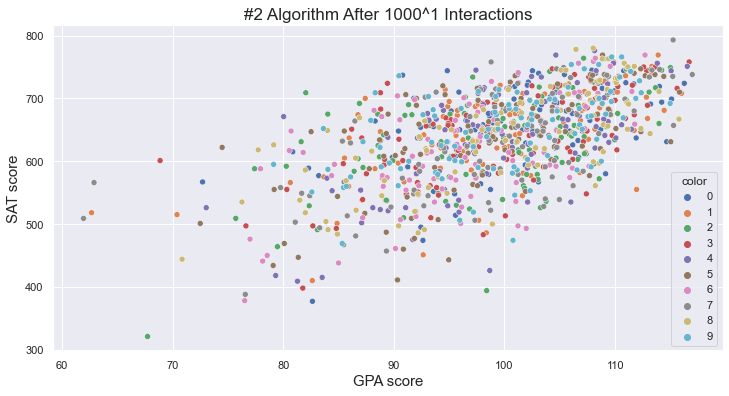

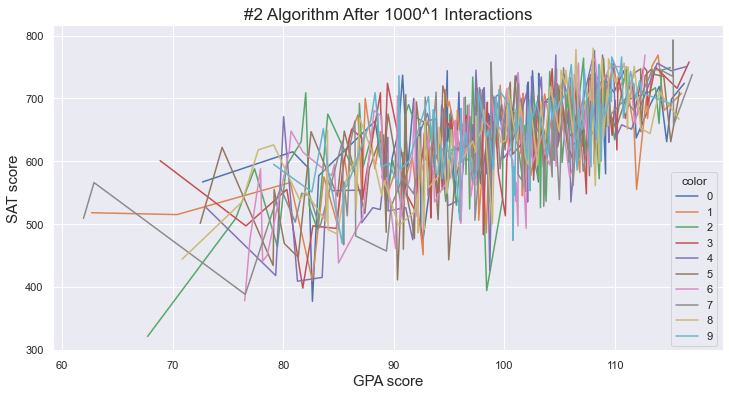

100%|███████████████████████████████████| 7692/7692 [00:00<00:00, 327402.67it/s]


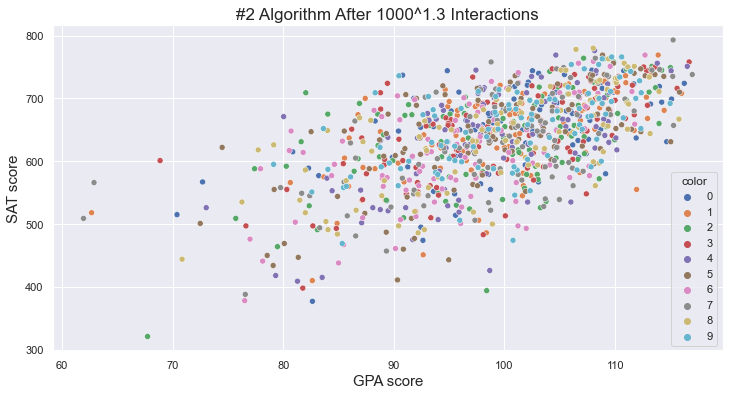

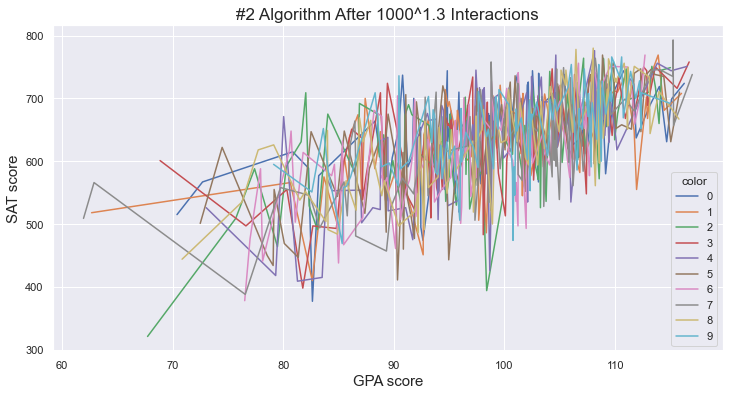

100%|█████████████████████████████████| 61100/61100 [00:00<00:00, 347651.00it/s]


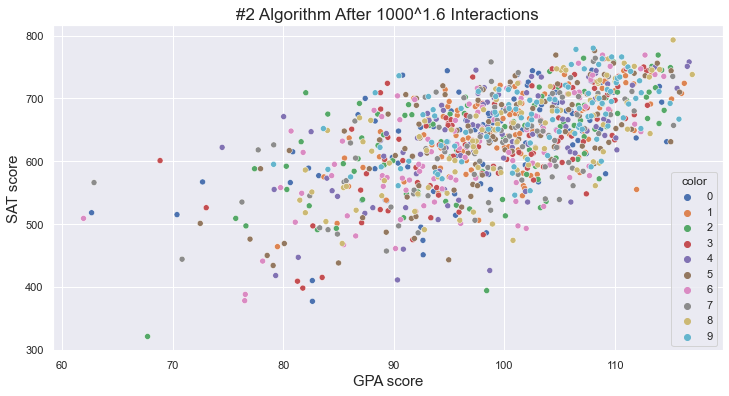

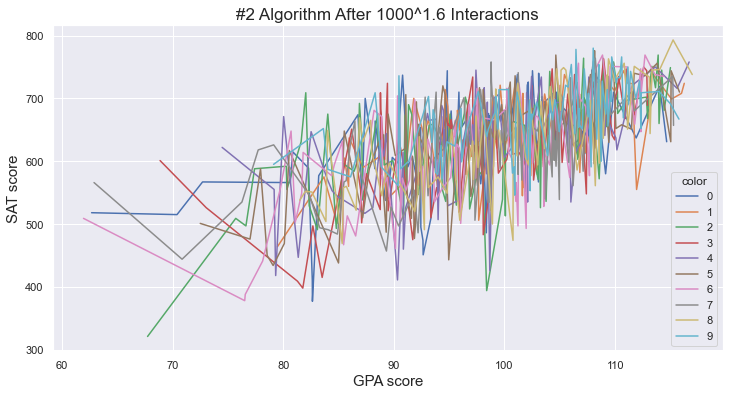

100%|███████████████████████████████| 485338/485338 [00:01<00:00, 349613.22it/s]


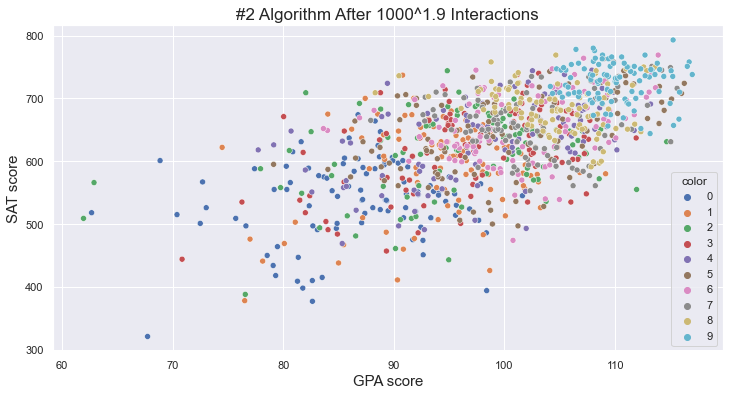

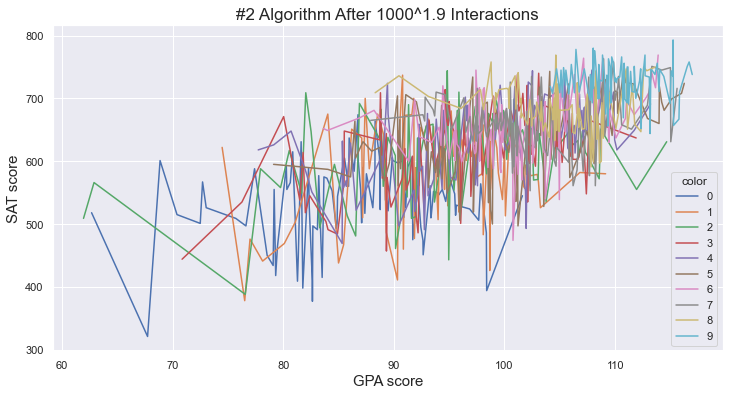

100%|█████████████████████████████| 3855179/3855179 [00:11<00:00, 322318.60it/s]


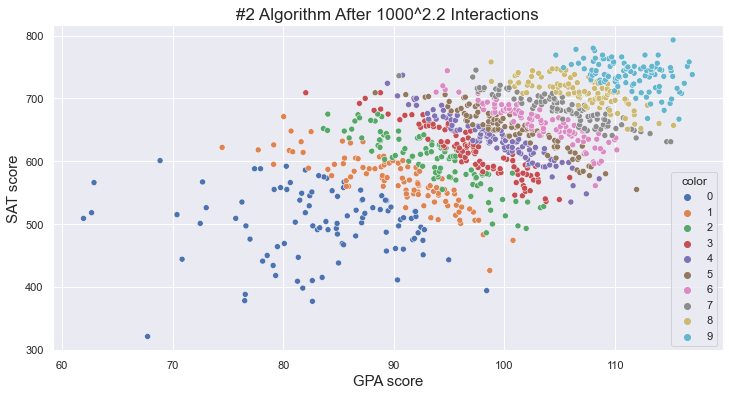

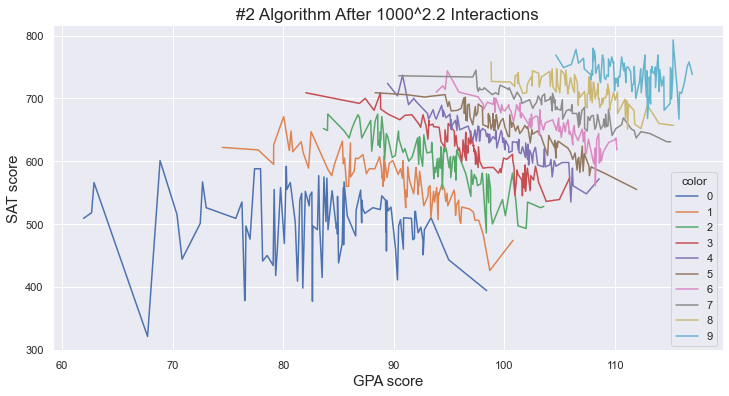

 40%|██████████▊                | 12248077/30622776 [00:38<00:57, 319297.16it/s]


KeyboardInterrupt: 

In [25]:
students_df_sort = students_df_sample.copy()
students_df_sort['color'] = [0]*students_df_sort.shape[0]
for cycle in [1,1.3,1.6,1.9,2.2,2.5,2.8,3,'n3logn',3.3]:
    if cycle == 1:
        interactions = int(pow(num_students, cycle))
    elif cycle == 'n3logn':
        cycle = '3*log\({}\)'.format(num_students)
        interactions = int(pow(num_students,3)*math.log(num_students)-pow(num_students, 3))
    else:
        interactions = int(pow(num_students, cycle)-pow(num_students, cycle-0.5))
    students_df_sort = random_sort(students_df_sort, interactions, num_colors=10)
    
    sns.scatterplot(data=students_df_sort, x="gpa", y="sat", hue="color", palette='deep', markers = True, ci= None)
    sns.set(rc = {'figure.figsize':(12,6)})
    plt.title('#2 Algorithm After {}^{} Interactions'.format(num_students, cycle), size = 17)
    plt.ylabel('SAT score', size = 15)
    plt.xlabel('GPA score', size = 15)
    plt.show()
    sns.lineplot(data=students_df_sort, x="gpa", y="sat", hue="color", palette='deep', markers = True, ci= None)
    sns.set(rc = {'figure.figsize':(12,6)})
    plt.title('#2 Algorithm After {}^{} Interactions'.format(num_students, cycle), size = 17)
    plt.ylabel('SAT score', size = 15)
    plt.xlabel('GPA score', size = 15)
    plt.show()